In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingAustralia.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,3433,2016-04-19,Australia,-37.845626,144.986974,2.0,1.0,1.0,1.0,185.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4
1,3435,2015-04-18,Australia,-37.846864,144.993309,2.0,2.0,1.0,1.0,110.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,4
2,3436,2015-08-25,Australia,-37.880397,145.068864,6.0,2.0,3.0,4.0,260.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8
3,3437,2013-05-29,Australia,-37.837213,144.993544,4.0,1.0,1.0,2.0,220.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5
4,3439,2013-02-26,Australia,-37.843662,144.996615,2.0,1.0,0.0,1.0,130.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29651,489142,2013-10-14,Australia,-28.743149,153.541507,8.0,2.0,4.0,4.0,401.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,10
29652,489143,2012-02-14,Australia,-28.787717,153.593668,2.0,0.0,1.0,1.0,95.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2
29653,489144,2015-10-14,Australia,-28.787241,153.591895,4.0,1.5,2.0,2.0,371.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,10
29654,489145,2014-01-02,Australia,-28.803775,153.335886,2.0,1.0,1.0,3.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,1


<AxesSubplot:ylabel='Frequency'>

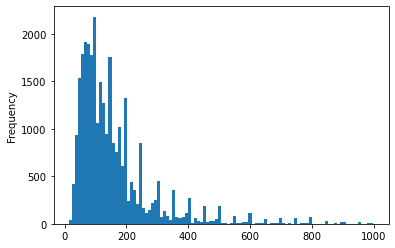

In [3]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [4]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,3433,2016-04-19,Australia,-37.845626,144.986974,2.0,1.0,1.0,1.0,185.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,4,group_4
1,3435,2015-04-18,Australia,-37.846864,144.993309,2.0,2.0,1.0,1.0,110.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,4,group_3
2,3436,2015-08-25,Australia,-37.880397,145.068864,6.0,2.0,3.0,4.0,260.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8,group_5
3,3437,2013-05-29,Australia,-37.837213,144.993544,4.0,1.0,1.0,2.0,220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,5,group_5
4,3439,2013-02-26,Australia,-37.843662,144.996615,2.0,1.0,0.0,1.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2,group_3


In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [6]:
train['group'].value_counts() / len(train)

group_2    0.325830
group_5    0.221759
group_3    0.221632
group_4    0.137835
group_1    0.092944
Name: group, dtype: float64

In [7]:
test['group'].value_counts() / len(test)

group_2    0.325860
group_3    0.221679
group_5    0.221679
group_4    0.137896
group_1    0.092886
Name: group, dtype: float64

In [8]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
5858,107438,2013-08-06,Australia,-33.891237,151.270344,2.0,1.5,1.0,1.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8
13148,199498,2014-05-13,Australia,-33.819227,151.250491,6.0,1.0,2.0,5.0,290.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,5
19829,318053,2012-02-05,Australia,-37.799940,144.984574,6.0,1.0,0.0,3.0,100.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,2
10851,176886,2015-08-16,Australia,-33.876674,151.214536,2.0,1.0,1.0,1.0,90.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,8
14843,227871,2015-09-22,Australia,-37.870699,145.172357,2.0,1.0,1.0,2.0,48.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,9


In [9]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10078,-33.738283,150.729617,6.0,1.0,1.0,1.0,53.0,2.0,25.0,1.0,1125.0,19.0,0.0,1.0,0.0,5,8
7619,-33.795978,151.181445,4.0,1.0,2.0,3.0,144.0,1.0,0.0,21.0,1125.0,1.0,1.0,0.0,0.0,0,5
10394,-33.875097,151.170573,8.0,2.0,4.0,8.0,570.0,1.0,0.0,7.0,21.0,1.0,1.0,0.0,0.0,2,5
20739,-33.848705,151.284596,2.0,1.0,2.0,2.0,155.0,2.0,10.0,1.0,7.0,12.0,1.0,0.0,0.0,1,6
27611,-33.914356,151.210013,2.0,1.0,1.0,1.0,80.0,1.0,0.0,14.0,21.0,3.0,0.0,1.0,0.0,0,11


In [10]:
train_y = train[['Price']]
train_y.head()

,Price
5858,80.0
13148,290.0
19829,100.0
10851,90.0
14843,48.0


In [11]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
5858,-33.891237,151.270344,2.0,1.5,1.0,1.0,1.0,0.0,1.0,9.0,7.0,0.0,1.0,0.0,1,8
13148,-33.819227,151.250491,6.0,1.0,2.0,5.0,4.0,50.0,2.0,3.0,9.0,1.0,0.0,0.0,1,5
19829,-37.799940,144.984574,6.0,1.0,0.0,3.0,1.0,35.0,2.0,1125.0,142.0,1.0,0.0,0.0,6,2
10851,-33.876674,151.214536,2.0,1.0,1.0,1.0,1.0,20.0,5.0,9.0,3.0,1.0,0.0,0.0,6,8
14843,-37.870699,145.172357,2.0,1.0,1.0,2.0,1.0,7.0,2.0,1125.0,8.0,0.0,1.0,0.0,1,9


In [12]:
test_y= test[['Price']]
test_y.head()

,Price
10078,53.0
7619,144.0
10394,570.0
20739,155.0
27611,80.0


In [13]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
10078,-33.738283,150.729617,6.0,1.0,1.0,1.0,2.0,25.0,1.0,1125.0,19.0,0.0,1.0,0.0,5,8
7619,-33.795978,151.181445,4.0,1.0,2.0,3.0,1.0,0.0,21.0,1125.0,1.0,1.0,0.0,0.0,0,5
10394,-33.875097,151.170573,8.0,2.0,4.0,8.0,1.0,0.0,7.0,21.0,1.0,1.0,0.0,0.0,2,5
20739,-33.848705,151.284596,2.0,1.0,2.0,2.0,2.0,10.0,1.0,7.0,12.0,1.0,0.0,0.0,1,6
27611,-33.914356,151.210013,2.0,1.0,1.0,1.0,1.0,0.0,14.0,21.0,3.0,0.0,1.0,0.0,0,11


In [14]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [16]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [17]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [18]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [19]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [20]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [21]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [22]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [23]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [24]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [25]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [26]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [27]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [28]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [29]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_18364/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

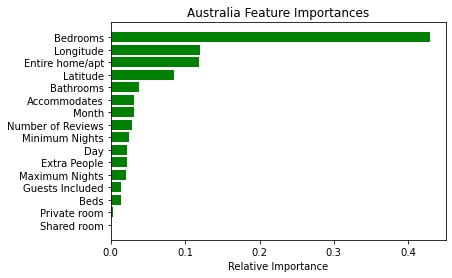

In [30]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Australia Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [31]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

708.9470815123925 26.62606019508693 15.605091047040974


In [32]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [33]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [34]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)